# Generate Maps using Plotly

In [16]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import wbdata
import datetime
import plotly.express as px

In [17]:
# fetch data of world bank total population and gdp per capita for the year 2023
import wbdata
import pandas as pd

# Define the indicator for population (SP.POP.TOTL)
indicator = {
    'SP.POP.TOTL': 'total_population'
            }

# Define countries (India and Pakistan)
# countries = ['IN', 'PK', 'BD', 'LK', 'AF']  # 'IN' for India, 'PK' for Pakistan

# Fetch data
data = wbdata.get_dataframe(indicator, 
                            # country=countries,
                            )

# Reset index to convert it into a DataFrame
data.reset_index(inplace=True)

# Rename columns for clarity
data.rename(columns={'country': 'Country', 'date': 'Year'}, inplace=True)

# Ensure Year column is numeric
data['Year'] = pd.to_numeric(data['Year'])

# Filter data between 1960 and 2023
df = data[(data['Year'] <= 2023) & (data['Year'] >= 1960)]
df.sample(5, random_state=42)

# # Save to a CSV file (optional)
df.to_csv("./dataset/total_population.csv", index=False)

# # Display the first few rows of data
# print(data.head())


In [18]:
df.info()

<class 'wbdata.client.DataFrame'>
RangeIndex: 17024 entries, 0 to 17023
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Country           17024 non-null  object 
 1   Year              17024 non-null  int64  
 2   total_population  16930 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 399.1+ KB


In [20]:
# make choropleth map of total population using plotly
fig = px.choropleth(df[df['Year'] == 2023], 
                    locations="Country",
                    locationmode='country names',
                    color="total_population",
                    hover_name="Country",
                    color_continuous_scale=px.colors.sequential.Viridis, # 'Viridis',
                    title="Total Population in 2023",
                    labels={'total_population': 'Total Population'}
                    )
# limit the scale of the colorbar
fig.update_layout(
    coloraxis_colorbar=dict(
        title='Total Population',
        tickvals=[1e6, 1e7, 1e8, 1.5e9],  # Custom tick values
        ticktext=['1M', '10M', '100M', '1.5B']  # Custom tick labels
    ),
    coloraxis=dict(
        cmin=0,  # Minimum value
        cmax=0.5e9  # Maximum value set to 1.5 billion
    )
)
fig.show()

In [ ]:
# fetch data of world bank total population and gdp per capita for the year 2023
import wbdata
import pandas as pd
import plotly.express as px
import wbdata
import datetime

# Define the indicator for population (SP.POP.TOTL)
indicator = {
    'SP.POP.TOTL': 'total_population'
            }

# Define countries (India and Pakistan)
countries = ['IN', 'PK', 'BD', 'LK', 'AF']  # 'IN' for India, 'PK' for Pakistan

# Fetch data
data = wbdata.get_dataframe(indicator, 
                            country=countries,
                            )

# Reset index to convert it into a DataFrame
data.reset_index(inplace=True)

# Rename columns for clarity
data.rename(columns={'country': 'Country', 'date': 'Year'}, inplace=True)

# Ensure Year column is numeric
data['Year'] = pd.to_numeric(data['Year'])

# Filter data between 1960 and 2023
df = data[(data['Year'] <= 2023) & (data['Year'] >= 1960)]
df.sample(5, random_state=42)

# # Save to a CSV file (optional)
# data.to_csv("./dataset/total_population.csv", index=False)

# # Display the first few rows of data
# print(data.head())

# make choropleth map of total population using plotly
fig = px.choropleth(df[df['Year'] == 2023], 
                    locations="Country",
                    locationmode='country names',
                    color="total_population",
                    hover_name="Country",
                    color_continuous_scale=px.colors.sequential.Viridis, # 'Viridis',
                    title="Total Population in 2023",
                    labels={'total_population': 'Total Population'}
                    )

fig.show()

In [28]:
# make choropleth map of total population using plotly
fig = px.choropleth(df[df['Year'] == 2023], 
                    locations="Country",
                    locationmode='country names',
                    color="total_population",
                    hover_name="Country",
                    color_continuous_scale=px.colors.sequential.Viridis, # 'Viridis',
                    title="Total Population in 2023",
                    labels={'total_population': 'Total Population'}
                    )
# update the plot type to orthographic
fig.update_geos(projection_type="equirectangular") # 'natural earth', 'equirectangular', 'orthographic', 'mercator', 'miller', 'robinson', 'eckert4', 'azimuthal equal area', 'azimuthal equidistant', 'conic equal area', 'conic conformal', 'conic equidistant', 'gnomonic', 'stereographic', 'mollweide', 'hammer', 'transverse mercator', 'albers usa', 'winkel tripel', 'aitoff', 'sinusoidal'
fig.show()

In [ ]:
# fetch data of world bank total population and gdp per capita for the year 2023
import wbdata
import pandas as pd
import plotly.express as px
import wbdata
import datetime

# Define the indicator for population (SP.POP.TOTL)
indicator = {
    'SP.POP.TOTL': 'total_population',
    'NY.GDP.PCAP.CD': 'gdp_per_capita',
    # net migration
    'SM.POP.NETM': 'net_migration',
            }

# Define countries (India and Pakistan)
countries = ['IN', 'PK', 'BD', 'LK', 'AF']  # 'IN' for India, 'PK' for Pakistan

# Fetch data
data = wbdata.get_dataframe(indicator, 
                            country=countries,
                            )

# Reset index to convert it into a DataFrame
data.reset_index(inplace=True)

# Rename columns for clarity
data.rename(columns={'country': 'Country', 'date': 'Year'}, inplace=True)

# Ensure Year column is numeric
data['Year'] = pd.to_numeric(data['Year'])

# Filter data between 1960 and 2023
df = data[(data['Year'] <= 2023) & (data['Year'] >= 1960)]
df.sample(5, random_state=42)
# make choropleth map of total population using plotly
fig = px.choropleth(df[df['Year'] == 2023], 
                    locations="Country",
                    locationmode='country names',
                    color="gdp_per_capita",
                    hover_name="Country",
                    color_continuous_scale=px.colors.sequential.Viridis, # 'Viridis',
                    title="Total Population in 2023",
                    labels={'gdp_per_capita': 'GDP Per Capita (Current US$)'}
                    )
# update the plot type to orthographic
fig.update_geos(projection_type="eckert4") # 'natural earth', 'equirectangular', 'orthographic', 'mercator', 'miller', 'robinson', 'eckert4', 'azimuthal equal area', 'azimuthal equidistant', 'conic equal area', 'conic conformal', 'conic equidistant', 'gnomonic', 'stereographic', 'mollweide', 'hammer', 'transverse mercator', 'albers usa', 'winkel tripel', 'aitoff', 'sinusoidal'
fig.show()


In [30]:
# fetch data of world bank total population and gdp per capita for the year 2023
import wbdata
import pandas as pd
import plotly.express as px
import wbdata
import datetime

# Define the indicator for population (SP.POP.TOTL)
indicator = {
    'SP.POP.TOTL': 'total_population',
    'NY.GDP.PCAP.CD': 'gdp_per_capita',
    # net migration
    'SM.POP.NETM': 'net_migration',
             }

# Define countries (India and Pakistan)
# countries = ['IN', 'PK', 'BD', 'LK', 'AF']  # 'IN' for India, 'PK' for Pakistan

# Fetch data
data = wbdata.get_dataframe(indicator, 
                            # country=countries,
                            )

# Reset index to convert it into a DataFrame
data.reset_index(inplace=True)

# Rename columns for clarity
data.rename(columns={'country': 'Country', 'date': 'Year'}, inplace=True)

# Ensure Year column is numeric
data['Year'] = pd.to_numeric(data['Year'])

# Filter data between 1960 and 2023
df = data[(data['Year'] <= 2023) & (data['Year'] >= 1960)]
df.sample(5, random_state=42)
# make choropleth map of total population using plotly
fig = px.choropleth(df[df['Year'] == 2023], 
                    locations="Country",
                    locationmode='country names',
                    color="gdp_per_capita",
                    hover_name="Country",
                    color_continuous_scale=px.colors.sequential.Viridis, # 'Viridis',
                    title="Total Population in 2023",
                    labels={'gdp_per_capita': 'GDP Per Capita (Current US$)'}
                    )
# update the plot type to orthographic
fig.update_geos(projection_type="orthographic") # 'natural earth', 'equirectangular', 'orthographic', 'mercator', 'miller', 'robinson', 'eckert4', 'azimuthal equal area', 'azimuthal equidistant', 'conic equal area', 'conic conformal', 'conic equidistant', 'gnomonic', 'stereographic', 'mollweide', 'hammer', 'transverse mercator', 'albers usa', 'winkel tripel', 'aitoff', 'sinusoidal'
fig.show()


In [31]:
# fetch data of world bank total population and gdp per capita for the year 2023
import wbdata
import pandas as pd
import plotly.express as px
import wbdata
import datetime

# Define the indicator for population (SP.POP.TOTL)
indicator = {
    'SP.POP.TOTL': 'total_population',
    'NY.GDP.PCAP.CD': 'gdp_per_capita',
    # net migration
    'SM.POP.NETM': 'net_migration',
             }

# Define countries (India and Pakistan)
countries = ['IN', 'PK', 'BD', 'LK', 'AF']  # 'IN' for India, 'PK' for Pakistan

# Fetch data
data = wbdata.get_dataframe(indicator, 
                            country=countries,
                            )

# Reset index to convert it into a DataFrame
data.reset_index(inplace=True)

# Rename columns for clarity
data.rename(columns={'country': 'Country', 'date': 'Year'}, inplace=True)

# Ensure Year column is numeric
data['Year'] = pd.to_numeric(data['Year'])

# Filter data between 1960 and 2023
df = data[(data['Year'] <= 2023) & (data['Year'] >= 1960)]
df.sample(5, random_state=42)
# sort the data by Year
df.sort_values(by='Year', inplace=True)
# make choropleth map of total population using plotly
fig = px.choropleth(df,
                    animation_frame="Year", 
                    locations="Country",
                    locationmode='country names',
                    color="gdp_per_capita",
                    hover_name="Country",
                    color_continuous_scale=px.colors.sequential.Viridis, # 'Viridis',
                    title="Total Population in 2023",
                    labels={'gdp_per_capita': 'GDP Per Capita (Current US$)'}
                    )
# update the plot type to orthographic
# fig.update_geos(projection_type="orthographic") # 'natural earth', 'equirectangular', 'orthographic', 'mercator', 'miller', 'robinson', 'eckert4', 'azimuthal equal area', 'azimuthal equidistant', 'conic equal area', 'conic conformal', 'conic equidistant', 'gnomonic', 'stereographic', 'mollweide', 'hammer', 'transverse mercator', 'albers usa', 'winkel tripel', 'aitoff', 'sinusoidal'
fig.show()

# save the animation as a gif




In [41]:
# fetch data of world bank total population and gdp per capita for the year 2023
import wbdata
import pandas as pd
import plotly.express as px
import wbdata
import datetime

# Define the indicator for population (SP.POP.TOTL)
indicator = {
    # 'SP.POP.TOTL': 'total_population',
    'NY.GDP.PCAP.CD': 'gdp_per_capita',
    # net migration
    # 'SM.POP.NETM': 'net_migration',
            }

# Define countries (India and Pakistan)
# countries = ['IN', 'PK', 'BD', 'LK', 'AF']  # 'IN' for India, 'PK' for Pakistan

# Fetch data
data = wbdata.get_dataframe(indicator, 
                            # country=countries,
                            )

# Reset index to convert it into a DataFrame
data.reset_index(inplace=True)

# Rename columns for clarity
data.rename(columns={'country': 'Country', 'date': 'Year'}, inplace=True)

# Ensure Year column is numeric
data['Year'] = pd.to_numeric(data['Year'])

# Filter data between 1960 and 2023
df = data[(data['Year'] <= 2023) & (data['Year'] >= 1960)]
df.sample(5, random_state=42)
# sort the data by Year
df.sort_values(by='Year', inplace=True)
# make choropleth map of total population using plotly
fig = px.choropleth(df,
                    animation_frame="Year", 
                    locations="Country",
                    locationmode='country names',
                    color="gdp_per_capita",
                    hover_name="Country",
                    color_continuous_scale=px.colors.sequential.Viridis, # 'Viridis',
                    title="Total Population in 2023",
                    labels={'gdp_per_capita': 'GDP Per Capita (Current US$)'}
                    )
# update the plot type to orthographic
# fig.update_geos(projection_type="orthographic") # 'natural earth', 'equirectangular', 'orthographic', 'mercator', 'miller', 'robinson', 'eckert4', 'azimuthal equal area', 'azimuthal equidistant', 'conic equal area', 'conic conformal', 'conic equidistant', 'gnomonic', 'stereographic', 'mollweide', 'hammer', 'transverse mercator', 'albers usa', 'winkel tripel', 'aitoff', 'sinusoidal'
fig.show()

# save the animation as a gif




MoviePy - Building file ./03_plotly/animated_plot.gif with imageio.


MoviePy - Building video ./03_plotly/animated_plot.mp4.
MoviePy - Writing video ./03_plotly/animated_plot.mp4



MoviePy - Done !
MoviePy - video ready ./03_plotly/animated_plot.mp4
MoviePy - Building video ./03_plotly/animated_plot_HD.mp4.
MoviePy - Writing video ./03_plotly/animated_plot_HD.mp4



MoviePy - Done !
MoviePy - video ready ./03_plotly/animated_plot_HD.mp4


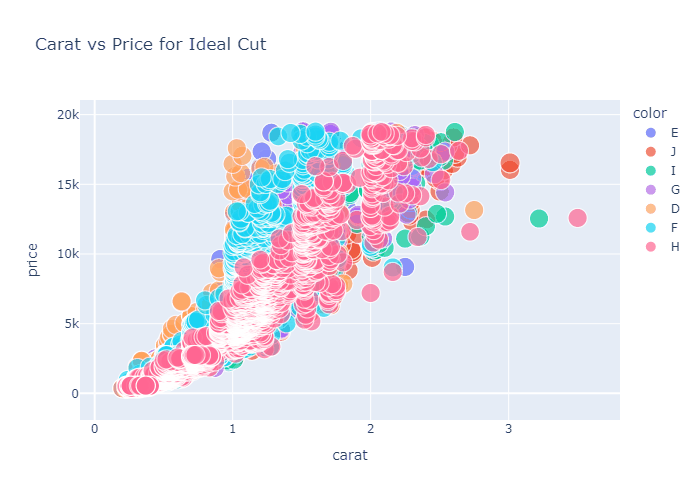

In [32]:
import plotly.express as px
import seaborn as sns
import os
from moviepy import ImageSequenceClip

# Load the diamonds dataset
df = sns.load_dataset('diamonds')

# Check for missing values
if df.isnull().any().any():
    raise ValueError("The dataset contains missing values. Please handle them before plotting.")

# Create a directory to save frames
frames_dir = "frames"
os.makedirs(frames_dir, exist_ok=True)

# Extract unique values for the 'cut' column to iterate over
unique_cuts = df['cut'].unique()

# Save each frame as an image
for i, cut in enumerate(unique_cuts):
    # Filter the data for the current cut
    filtered_df = df[df['cut'] == cut]
    
    # Ensure filtered data is valid
    if filtered_df.empty:
        continue

    # Create the scatter plot for the current cut
    frame_fig = px.scatter(
        filtered_df, x='carat', y='price',
        color='color',
        title=f'Carat vs Price for {cut} Cut',
        size='depth',
        hover_data=['clarity']
    )
    
    # Save the frame image using Kaleido
    frame_filename = os.path.join(frames_dir, f"frame_{i:03d}.png")
    frame_fig.write_image(frame_filename, engine="kaleido")

# Create a GIF or MP4 using moviepy
image_files = [os.path.join(frames_dir, f) for f in sorted(os.listdir(frames_dir)) if f.endswith('.png')]
clip = ImageSequenceClip(image_files, fps=2)  # Adjust fps as needed
clip.write_gif("./03_plotly/animated_plot.gif", fps=2)    # Save as GIF
clip.write_videofile("./03_plotly/animated_plot.mp4", fps=1)  # Save as MP4
# save HD video
clip.write_videofile("./03_plotly/animated_plot_HD.mp4", fps=1, codec="libx264", preset="ultrafast", bitrate="3000k")
# Display the GIF in Jupyter Notebook
from IPython.display import Image
Image("./03_plotly/animated_plot.gif")

In [ ]:
import wbdata
import pandas as pd
import plotly.express as px
import os
from moviepy import ImageSequenceClip

# Define the indicator for population (SP.POP.TOTL) and GDP per capita (NY.GDP.PCAP.CD)
indicator = {
    'SP.POP.TOTL': 'total_population',
    'NY.GDP.PCAP.CD': 'gdp_per_capita',
}

# Define countries
# countries = ['IN', 'PK', 'BD', 'LK', 'AF']

# Fetch data
data = wbdata.get_dataframe(indicator, 
                            # country=countries,
                            )
data.reset_index(inplace=True)
data.rename(columns={'country': 'Country', 'date': 'Year'}, inplace=True)
data['Year'] = pd.to_numeric(data['Year'])

# Handle missing values
# Replace missing gdp_per_capita and total_population with 0
data['gdp_per_capita'] = data['gdp_per_capita'].fillna(0)
data['total_population'] = data['total_population'].fillna(0)

# Filter data for valid years
df = data[(data['Year'] <= 2023) & (data['Year'] >= 1960)]
df.sort_values(by='Year', inplace=True)

# Check for missing or invalid data after filtering
if df.isnull().values.any():
    print("Data still contains missing values. Please check.")
    print(df[df.isnull().any(axis=1)])  # Print rows with missing values

# Directory to save frames
frames_dir = "frames_map"
os.makedirs(frames_dir, exist_ok=True)

# Save each frame as an image
unique_years = df['Year'].unique()
for i, year in enumerate(unique_years):
    # Filter data for the current year
    filtered_df = df[df['Year'] == year]
    
    # Create the choropleth map for the current year
    frame_fig = px.choropleth(
        filtered_df,
        locations="Country",
        locationmode='country names',
        color="gdp_per_capita",
        hover_name="Country",
        color_continuous_scale=px.colors.sequential.Viridis,
        title=f"GDP Per Capita (Current US$) - {year}",
        labels={'gdp_per_capita': 'GDP Per Capita'}
    )
    
    # Save the frame image using Kaleido
    frame_filename = os.path.join(frames_dir, f"frame_{i:03d}.png")
    frame_fig.write_image(frame_filename, engine="kaleido")

# Create a GIF or MP4 using moviepy
image_files = [os.path.join(frames_dir, f) for f in sorted(os.listdir(frames_dir)) if f.endswith('.png')]
clip = ImageSequenceClip(image_files, fps=2)  # Adjust FPS for animation speed

# Save as GIF
clip.write_gif("./04_maps_animated/animated_map.gif", fps=2)

# # Save as MP4
# clip.write_videofile("./05_maps_animation/animated_map.mp4", fps=2)

# # Save HD video
# clip.write_videofile("./05_maps_animation/animated_map_HD.mp4", fps=2, codec="libx264", preset="ultrafast", bitrate="3000k")


MoviePy - Building file ./04_maps_animated/animated_map.gif with imageio.


------